<a href="https://colab.research.google.com/github/Volodymyr-SV/udemy-ML/blob/main/Day_13_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [37]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [38]:
import random
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_drow = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        # print(random_drow)
        if random_drow > max_random: 
            max_random = random_drow
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 0:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    else:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    total_reward = total_reward + reward

In [39]:
print(numbers_of_rewards_1[4]/total_reward) # percentage of revords on ad5 from the total reword
for i in range(0, d):
    print("ad", i, numbers_of_rewards_1[i]/numbers_of_rewards_0[i]) # percentage of revords for each ad

0.5673076923076923
ad 0 0.08
ad 1 0.1891891891891892
ad 2 0.0
ad 3 0.2631578947368421
ad 4 0.4306569343065693
ad 5 0.0
ad 6 0.24324324324324326
ad 7 0.26153846153846155
ad 8 0.0
ad 9 0.0


## Visualising the results - Histogram

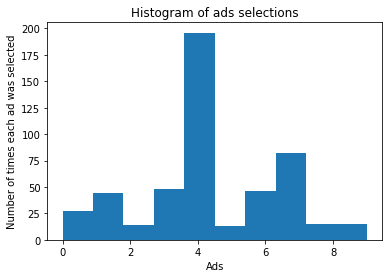

In [40]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()